# Breast Cancer Classification with SVM
This notebook uses the Wisconsin Breast Cancer Diagnosis dataset and applies Support Vector Machine (SVM) for classification. It includes data preprocessing, model training, evaluation (accuracy, sensitivity, specificity, ROC/AUC), and probability analysis.

## Load Dataset

In [1]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

print("Dataset loaded successfully.")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Dataset loaded successfully.
Features shape: (569, 30)
Target shape: (569,)


## Preprocess Data

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data preprocessing complete.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data preprocessing complete.
Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


## Train SVM Model

In [3]:
from sklearn.svm import SVC

# SVM with probability estimates for ROC/AUC
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

print("SVM model trained successfully.")

SVM model trained successfully.


## Evaluate Model Performance

Accuracy: 0.9737
Confusion Matrix:
[[41  2]
 [ 1 70]]
Sensitivity (True Positive Rate): 0.9859
Specificity (True Negative Rate): 0.9535


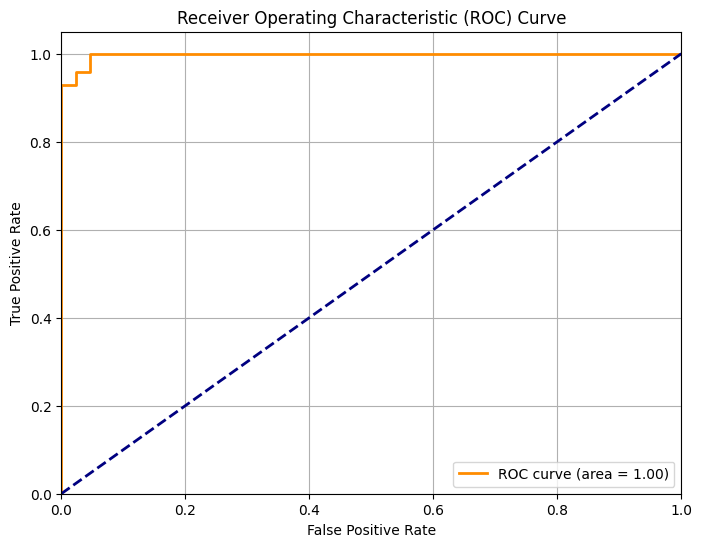

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Confusion Matrix:\n{cm}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")

y_pred_proba = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Analyze Predicted Probabilities

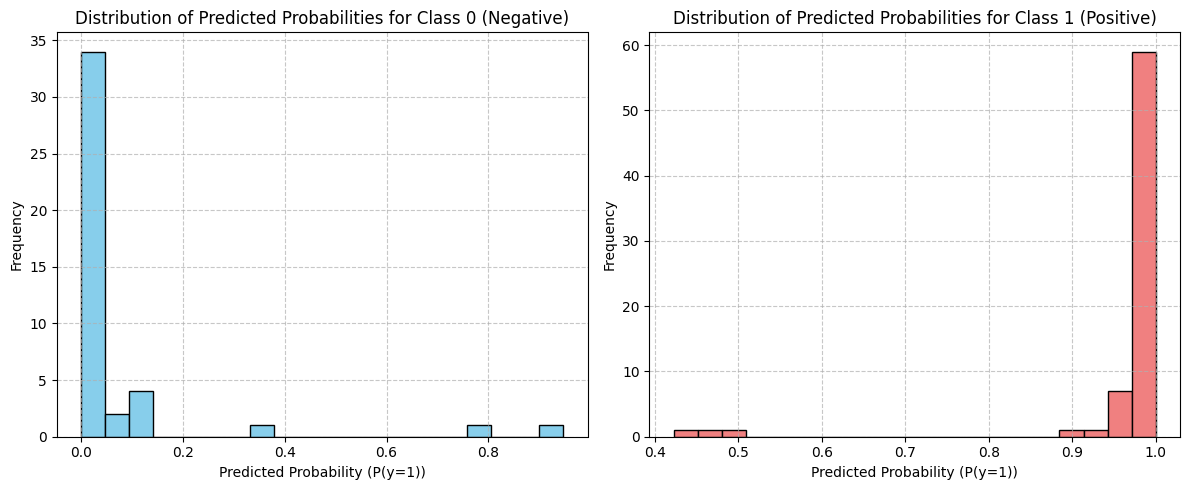

Distribution of predicted probabilities for both classes displayed.


In [5]:
prob_class_0 = y_pred_proba[y_test == 0]
prob_class_1 = y_pred_proba[y_test == 1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(prob_class_0, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities for Class 0 (Negative)')
plt.xlabel('Predicted Probability (P(y=1))')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.hist(prob_class_1, bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Predicted Probabilities for Class 1 (Positive)')
plt.xlabel('Predicted Probability (P(y=1))')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("Distribution of predicted probabilities for both classes displayed.")

## Summary

**SVM Model Performance:**

*   Accuracy, sensitivity, specificity, and ROC/AUC are reported above.
*   SVM provides a strong discriminative boundary and can handle non-linear relationships.
*   Probability analysis shows good separation between classes.


**Next Steps:**
*   Compare SVM with other classifiers (Naive Bayes, Logistic Regression, Random Forest) for best results.
*   Consider hyperparameter tuning for SVM (kernel, C, gamma) to optimize performance.